***

<center> <h1>Historical Voting Record Proportions</h1> </center>

***



* This notebook will take us through using some CDP tools/features to connect to and retrieve data from our databases.
* Included is how to take the objects retrieved from the database and format them for use in analysis(i.e. get them to a pandas dataframe format).
* We will end with a simple example of analysis performed on some voting records data.
* The purpose of this notebook is not to try to explain any patterns or lack thereof in historical vote's, but merely to walk through an example of using CDP's tools and data to perform actual analysis on the data available to any interested party.


***

<center> <h2> Load relevant libraries for the task</h2> </center>

***

In [14]:
## Libraries for connection and retrieval from the database
import fireo  
from google.cloud.firestore import Client
from google.auth.credentials import AnonymousCredentials
from cdp_backend.database import models as db_models


## Libraries for working with the data files
import pandas as pd

## For plotting
from matplotlib import pyplot as plt
import numpy as np

***

<center> <h2>Connect to the data base</h2> </center>

***

In [15]:
## To start off we will connect to Seattle's data base.
seattle = "cdp-seattle-21723dcf"
fireo.connection(client=Client(
    project=seattle,
    credentials=AnonymousCredentials()
))

***

<center> <h3> Fetch all historical votes from data base</h3> </center>

***

In [16]:
############ Select all of the records from the Vote table ############

##    If you want to specify a certain amount of records, 
##     just specify an amount within fetch() function
seattle_voting_records = list(db_models.Vote.collection.fetch()) 

## Preview file
seattle_voting_records[0:5]

In [17]:
print("Total Voting Records To Date:", len(seattle_voting_records))

Total Voting Records To Date: 10026


***

* These files actually just contain information about the voting records we are interested in.
* In order to work with the files we need to "unpack" them using this information we retrieved.

***

In [5]:
## Function to unpack voting records with data retrieved

def unpack_db_models(db_models_objects):
    '''
    Takes a list of db_models objects and returns a pandas dataframe.
    
    '''
    unpack = list(map(lambda x: {**x.to_dict(), 'id': x.id}, db_models_objects))
    voting_records_df = pd.DataFrame(unpack)
    voting_records_df.set_index('id', inplace=True)
    return(voting_records_df)

## Call unpack function on our list of objects
seattle_voting_records_df = unpack_db_models(seattle_voting_records)

In [6]:
## Preview random rows of dataframe
seattle_voting_records_df.sample(12)

,matter_ref,event_ref,event_minutes_item_ref,person_ref,decision,in_majority,external_source_id,key
id,,,,,,,,
cdadbe15a002,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,66432,vote/cdadbe15a002
996e95a126f0,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,63829,vote/996e95a126f0
d46192d4d040,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,63774,vote/d46192d4d040
453f7899e957,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,67197,vote/453f7899e957
49d711679e50,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Absent (Non-Voting),None,61625,vote/49d711679e50
40469712b4bb,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,64333,vote/40469712b4bb
b2a0f794edda,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,65129,vote/b2a0f794edda
d792f1ef0491,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,68999,vote/d792f1ef0491
02e4d351bb7d,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,64764,vote/02e4d351bb7d


***

* We can see that most of the columns in our dataframe are still in the wrapped location data format from the database.
* For the sake of this notebook we will just be looking at the "decision" and "in_majority" columns.
* First off we will find out what possible values each of these variables can take on.

***

In [7]:
## Get the unique values of decision column
values = list(seattle_voting_records_df.decision.unique())
values

['Approve', 'Absent (Non-Voting)', 'Reject']

***

* It looks like there are only three possible values for the decision column in our data, the possible values are: "Approve", "Reject" or the member is "Absent/Non-Voting".
* Let's tally up the totals for each decision value and see what the proportion is.

***

***

<center> <h2>Proportions of Voting Decisions</h2> </center>

***

In [18]:
## Count up the values for all of the different vote decisions.
totals_df = dict(seattle_voting_records_df['decision'].value_counts())


## Create a DataFrame using these values
count  = list(totals_df.values())
decisions = list(totals_df.keys())
totals_df = pd.DataFrame(data=totals_df, columns=['Decision', "Totals"])
totals_df['Decision'] = decisions
totals_df['Totals'] = count
totals_df

,Decision,Totals
0,Approve,9818
1,Reject,155
2,Absent (Non-Voting),53


***

* Since Absent/Non-Voting is such an insignificant amount we will just focus on the "Accept" and "Reject" values.

***

In [19]:
totals_df = totals_df[(totals_df["Decision"] == 'Approve') 
                      | (totals_df["Decision"] == 'Reject')]
totals_df

,Decision,Totals
0,Approve,9818
1,Reject,155


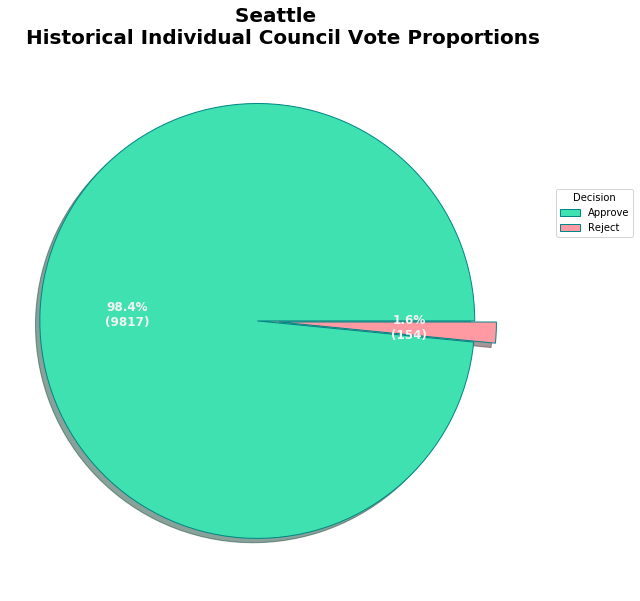

In [43]:
## Plotting proportion of votes

totals_data = totals_df['Totals'][0], totals_df['Totals'][1]

## Explode data
explode = (0.1, 0.0)

## Color parameters
colors = ("#3FE1B0", "#FF9AA2")

## 3D properties
wp = { 'linewidth' : 1, 'edgecolor' : "#008787" }

## Function to Calculate and Display Proportions
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(totals_df['Totals']))
    #return "{:.1f}%\n({:d})".format(pct, absolute)
    return "{:.1f}%\n({:d})".format(pct, absolute)

 
## Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(totals_data,
                                  autopct = lambda pct: func(pct, totals_data),
                                  explode = explode,
                                  #labels = values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#F2F2F2"))
 
## Plot Legend
ax.legend(wedges, 
          totals_df['Decision'],
          title ="Decision",
          loc ="center left",

          bbox_to_anchor =(1, 0, .5, 1.4))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Seattle \n Historical Individual Council Vote Proportions",
            size = 20, weight ="bold")
 
## Display Plot
plt.show()


***

* It is important to note that these are the **total individual** votes and **not** the actual **outcomes** for proposed legislative items.
* This seems like an extremely high proportion of Approval votes, and we will leave it to the reader to speculate why this could be.
* For comparison we could pull data from another council's database.
* We can generalize the above work into a single function and use a different infrastructure string as a parameter:

***

In [48]:
## Generalized function to replicate plot above for different council's
def plot_historical_individual_vote_share(council, title):
    """
    council parameter takes a project instance string and
    title parameter takes a string for the main title of the plot.
    Example:
    council="cdp-seattle-21723dcf", title="Seattle Plot"
    council parameter will be used for connection to that 
    specific instance database.
    
    """
    ## Connect to the database
    fireo.connection(client=Client(
        project=council,
        credentials=AnonymousCredentials()
    ))
    
    ## Fetch historical voting records
    voting_records = list(db_models.Vote.collection.fetch())
    ## Call unpack function on our new list of objects
    voting_records_df = unpack_db_models(voting_records)
    values = list(voting_records_df.decision.unique())
    totals_df = dict(voting_records_df['decision'].value_counts())


    ## Create a DataFrame using these values
    count  = list(totals_df.values())
    decisions = list(totals_df.keys())
    totals_df = pd.DataFrame(data=totals_df, 
                             columns=['Decision', "Totals"])
    totals_df['Decision'] = decisions
    totals_df['Totals'] = count

    ## Plotting proportion of votes

    totals_data = totals_df['Totals'][0], totals_df['Totals'][1]

    ## Explode data
    explode = (0.1, 0.0)

    ## Color parameters
    colors = ("#3FE1B0", "#FF9AA2")

    ## 3D properties
    wp = { 'linewidth' : 1, 'edgecolor' : "#008787" }

    ## Function to Calculate and Display Proportions
    def func(pct, allvalues):
        absolute = int(pct / 100.*sum(totals_df['Totals']))
        #return "{:.1f}%\n({:d})".format(pct, absolute)
        return "{:.1f}%\n({:d})".format(pct, absolute)

 
    ## Creating plot
    fig, ax = plt.subplots(figsize =(15, 10))
    wedges, texts, autotexts = ax.pie(totals_data,
                                      autopct = lambda pct: func(pct, 
                                                                 totals_data),
                                      explode = explode,
                                      #labels = values,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 0,
                                      wedgeprops = wp,
                                      textprops = dict(color ="#F2F2F2"))

    ## Plot Legend
    ax.legend(wedges, 
              totals_df['Decision'],
              title ="Decision",
              loc ="center left",

              bbox_to_anchor =(1, 0, .5, 1.4))

    plt.setp(autotexts, size = 12, weight ="bold")
    ax.set_title(title,
                 size = 20, weight ="bold")

    ## Display Plot
    plt.show()



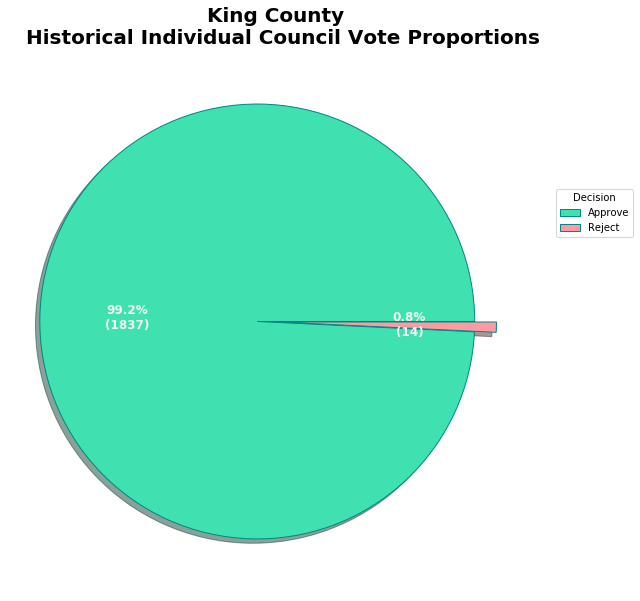

In [49]:
## Run function on King County WA
plot_historical_individual_vote_share(council="cdp-king-county-b656c71b",
    title="King County \n Historical Individual Council Vote Proportions")


*** 

* Well there you have it, simply swapping out the credentials allows for connection and replication of our analysis across different council's.
* Please feel free to use this notebook and code to do whatever you wish, we can't wait to see what you come up with! 

***